In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score, roc_curve
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import zipfile

with zipfile.ZipFile("datasets/bank.zip") as z:
    with z.open("bank.csv") as f:
        DF = pd.read_csv(f,sep=";")
        
DF.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [4]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [5]:
DF.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [6]:
# Part (D)
# " Extract the DataFrame column labeled “y” as your Y variable, e.g., using list
#      comprehension, possibly with Y=np.array([1 if x=="yes" else 0 for x in DF["y"]]) "

Y=np.array([1 if x=="yes" else 0 for x in DF["y"]])
Y[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [7]:
# Part(E) 
# " Use the remaining columns into your X data. Convert the categorical data into
#      numerical using get dummies and then into a numpy array "

X=np.array(pd.get_dummies(DF.drop(["y"],axis=1)))
X[:2]

array([[  30, 1787,   19,   79,    1,   -1,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    1,    0,    0,    1,    0,
           1,    0,    0,    0,    1,    0,    1,    0,    1,    0,    1,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    1,    0,    0,    0,    0,    1],
       [  33, 4789,   11,  220,    1,  339,    4,    0,    0,    0,    0,
           0,    0,    0,    1,    0,    0,    0,    0,    0,    1,    0,
           0,    1,    0,    0,    1,    0,    0,    1,    0,    1,    1,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    1,
           0,    0,    0,    1,    0,    0,    0]], dtype=int64)

In [8]:
# Part (F)
# " Classify the data using SVM (remember that you should scale the x-data first).
#       Determine an accuracy and make an ROC plot. "

SVM = SVC(kernel="rbf", probability=True)
x_train, x_test, y_train, y_test = tts(X, Y)
y_scores = SVM.fit(x_train, y_train).predict_proba(x_test)[:,1] # we can combine functions
accuracy_SVM = accuracy_score(y_test, y_scores.round())
FPR, TPR, _ = roc_curve(y_test, y_scores)

print("Accuracy:",accuracy_SVM)

Accuracy: 0.8859416445623343


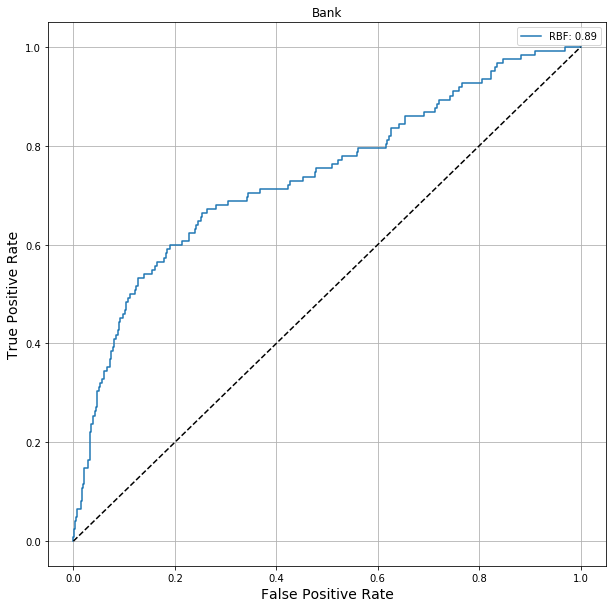

In [9]:
plt.plot(FPR, TPR, label="RBF: %.2f"%(accuracy_SVM))

plt.plot([0,1],[0,1],c="k",ls="--")
plt.grid()
plt.xlabel("False Positive Rate",fontsize=14)
plt.ylabel("True Positive Rate",fontsize=14)
plt.title("Bank")
plt.legend()
plt.gcf().set_size_inches(10,10)

In [10]:
# " Compare with other classification methods that you have learned. "

# LR and KNN

model = LogisticRegression(max_iter=10000)
x_train, x_test, y_train, y_test = tts(X,Y)
y_scores = model.fit(x_train, y_train).predict_proba(x_test)[:,1]
accuracy_LR = accuracy_score(y_test, y_scores.round())
FPR_LR, TPR_LR, _ = roc_curve(y_test, y_scores)

KNN = KNeighborsClassifier(n_neighbors=10)
x_train, x_test, y_train, y_test = tts(X, Y)
model = KNN.fit(x_train, y_train)
y_scores = model.fit(x_train, y_train).predict_proba(x_test)[:,1]
accuracy_KNN = accuracy_score(y_test, y_scores.round())
FPR_KNN, TPR_KNN, _ = roc_curve(y_test, y_scores)

print("Accuracy Logistic Regression: %.5f"%accuracy_LR)
print("Accuracy k-Nearest Neighbour: %.5f"%accuracy_KNN)

Accuracy Logistic Regression: 0.90186
Accuracy k-Nearest Neighbour: 0.89390


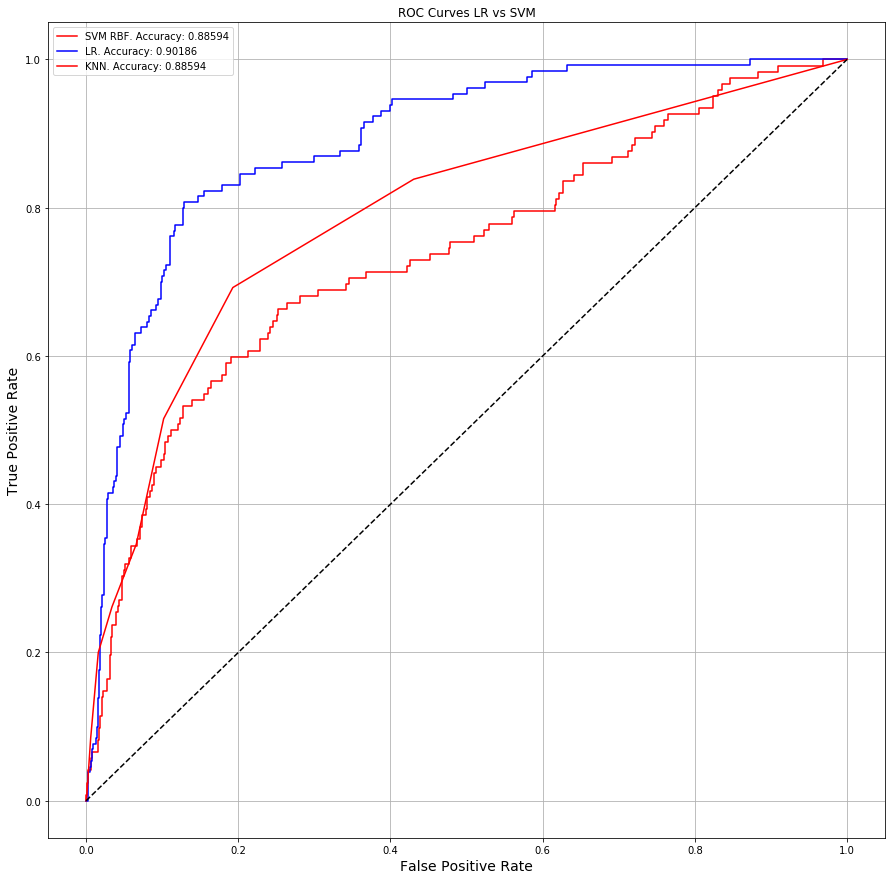

In [11]:
plt.plot(FPR, TPR, c="red", label="SVM RBF. Accuracy: %.5f"%(accuracy_SVM))
plt.plot(FPR_LR, TPR_LR, c="blue", label="LR. Accuracy: %.5f"%(accuracy_LR))
plt.plot(FPR_KNN, TPR_KNN, c="red", label="KNN. Accuracy: %.5f"%(accuracy_SVM))
plt.plot([0,1],[0,1],c="k",ls="--") # print a diagonal line
plt.grid()
plt.xlabel("False Positive Rate",fontsize=14)
plt.ylabel("True Positive Rate",fontsize=14)
plt.title("ROC Curves LR vs SVM")
plt.legend()
plt.gcf().set_size_inches(15,15)